# "Prevendo se um paciente irá falacer em decorrência de hepatite ou não"

### Exercício realizado durante o curso Data Science Aplicada à Área de Saúde da Data Science Academy

### 1) Definição do problema

A hepatite é a inflamação do fígado. Pode ser causada por vírus ou pelo uso de alguns remédios, álcool e outras drogas, assim como por doenças autoimunes, metabólicas e genéticas. Em alguns casos, são doenças silenciosas que nem sempre apresentam sintomas.

Sendo assim, é fundamental acompanhar atentamente o prognóstico de um paciente que venha desenvolver hepatite. Nesse sentido, construíremos um algoritmo capaz de prever se um paciente irá morrer ou não em decorrência da doença, baseado ná análise de dados históricos obtidos do repositório público da UCI.

https://archive.ics.uci.edu/ml/datasets/hepatitis

### 2) Carregando os Dados

In [1]:
# Importando os pacotes que iremos trabalhar
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
import matplotlib as m
m.__version__

'3.2.1'

In [3]:
import sklearn as sk
sk.__version__

'0.22.2'

In [4]:
# Título das colunas
nome_colunas = ['Class', 'Age', 'Gender', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'LiverBig',
                'LiverFirm', 'SpleenPalpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin','AlkPhosphate', 'SGOT',
                'Albumin', 'Protime', 'Histology']

In [5]:
# Carrega os dados
dados_hepatite = pd.read_csv('dados/dataset-data-munging-02-hepatite.data', 
                             names = nome_colunas, 
                             sep = ',', 
                             encoding = 'latin-1')

In [6]:
# Visualiza as primeiras linhas
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1


In [7]:
# Info sobre o dataset
dados_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    int64 
 1   Age             155 non-null    int64 
 2   Gender          155 non-null    int64 
 3   Steroid         155 non-null    object
 4   Antivirals      155 non-null    int64 
 5   Fatigue         155 non-null    object
 6   Malaise         155 non-null    object
 7   Anorexia        155 non-null    object
 8   LiverBig        155 non-null    object
 9   LiverFirm       155 non-null    object
 10  SpleenPalpable  155 non-null    object
 11  Spiders         155 non-null    object
 12  Ascites         155 non-null    object
 13  Varices         155 non-null    object
 14  Bilirubin       155 non-null    object
 15  AlkPhosphate    155 non-null    object
 16  SGOT            155 non-null    object
 17  Albumin         155 non-null    object
 18  Protime   

### 3) Data Munging - Preparando Dados para Análise Exploratória

Vemos em nosso dataset muitos valores '?', vamos substituir por 'NaN'

In [8]:
# Replace ? com valores NA
dados_hepatite.replace('?', np.nan, inplace = True)

In [9]:
# Visualiza as primeiras linhas
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,NaN,NaN,NaN,NaN,NaN,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,NaN,NaN,NaN,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,NaN,48,4.4,NaN,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,120,3.9,NaN,1


In [11]:
# Com a substituição por 'NaN' teremos muitos valores nulos em nosso conjunto de dados, que antes não tinha

dados_hepatite.count()

Class             155
Age               155
Gender            155
Steroid           154
Antivirals        155
Fatigue           154
Malaise           154
Anorexia          154
LiverBig          145
LiverFirm         144
SpleenPalpable    150
Spiders           150
Ascites           150
Varices           150
Bilirubin         149
AlkPhosphate      126
SGOT              151
Albumin           139
Protime            88
Histology         155
dtype: int64

In [12]:
dados_hepatite.AlkPhosphate.isnull().values.any()

True

In [13]:
dados_hepatite.AlkPhosphate.isnull().sum()

29

### 3.1 - Aplicando o Recurso de Imputação Para Tratamento de Valores Missing.

Vamos aplicar a substituição dos valores missing pela mediana, porque ela não é afetada por valores extremos, o que é bom em se tratando de dados da área de saúde. Diferente da média, que é afetada. 

In [14]:
# Função para o Replace das linhas vazias
def impute_median(series):
    return series.fillna(series.median())

In [15]:
# Aplica a função
dados_hepatite.Steroid = dados_hepatite['Steroid'].transform(impute_median)
dados_hepatite.Fatigue = dados_hepatite['Fatigue'].transform(impute_median)
dados_hepatite.Malaise = dados_hepatite['Malaise'].transform(impute_median)
dados_hepatite.Anorexia = dados_hepatite['Anorexia'].transform(impute_median)
dados_hepatite.LiverBig = dados_hepatite['LiverBig'].transform(impute_median)
dados_hepatite.LiverFirm = dados_hepatite['LiverFirm'].transform(impute_median)
dados_hepatite.SpleenPalpable = dados_hepatite['SpleenPalpable'].transform(impute_median)
dados_hepatite.Ascites = dados_hepatite['Ascites'].transform(impute_median)
dados_hepatite.Varices = dados_hepatite['Varices'].transform(impute_median)
dados_hepatite.Spiders = dados_hepatite['Spiders'].transform(impute_median)
dados_hepatite.Bilirubin = dados_hepatite['Bilirubin'].transform(impute_median)
dados_hepatite.SGOT = dados_hepatite['SGOT'].transform(impute_median)
by_class = dados_hepatite.groupby(['Class'])
dados_hepatite.AlkPhosphate = by_class['AlkPhosphate'].transform(impute_median)
by_bil_class = dados_hepatite.groupby(['Class'])
dados_hepatite.Albumin = by_bil_class['Albumin'].transform(impute_median)
dados_hepatite.Protime = by_bil_class['Protime'].transform(impute_median)

In [16]:
#verificando se tem valores ausentes
dados_hepatite.count()

Class             155
Age               155
Gender            155
Steroid           155
Antivirals        155
Fatigue           155
Malaise           155
Anorexia          155
LiverBig          155
LiverFirm         155
SpleenPalpable    155
Spiders           155
Ascites           155
Varices           155
Bilirubin         155
AlkPhosphate      155
SGOT              155
Albumin           155
Protime           155
Histology         155
dtype: int64

In [17]:
# Visualiza as primeiras linhas
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,66,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,66,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,66,1
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,200,4.0,66,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
6,1,51,1,1,2,1,2,1,2,2,1,1,2,2,1,113.5,58,3.3,39,1
7,2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,58,4,66,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,85,48,4.4,66,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,85,120,3.9,66,1


In [18]:
# Info sobre o dataset
dados_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class           155 non-null    int64 
 1   Age             155 non-null    int64 
 2   Gender          155 non-null    int64 
 3   Steroid         155 non-null    object
 4   Antivirals      155 non-null    int64 
 5   Fatigue         155 non-null    object
 6   Malaise         155 non-null    object
 7   Anorexia        155 non-null    object
 8   LiverBig        155 non-null    object
 9   LiverFirm       155 non-null    object
 10  SpleenPalpable  155 non-null    object
 11  Spiders         155 non-null    object
 12  Ascites         155 non-null    object
 13  Varices         155 non-null    object
 14  Bilirubin       155 non-null    object
 15  AlkPhosphate    155 non-null    object
 16  SGOT            155 non-null    object
 17  Albumin         155 non-null    object
 18  Protime   

### 3.2 - Convertendo variáveis categóricas para o tipo numérico

Embora eu tenha variáveis com valores numéricos, o Pandas identifica como sendo categórica, porque são valores muito pequenos, como 0,1 e 2.

In [19]:
# Estatísticas das colunas numéricas
dados_hepatite.describe()

,Class,Age,Gender,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [20]:
# Extrai as colunas do tipo object (qualitativas)
cols = dados_hepatite.columns[dados_hepatite.dtypes.eq('object')]

In [21]:
# Converte as colunas para o tipo numérico
dados_hepatite[cols] = dados_hepatite[cols].apply(pd.to_numeric, errors = 'coerce')

In [22]:
# Info sobre o dataset
dados_hepatite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           155 non-null    int64  
 1   Age             155 non-null    int64  
 2   Gender          155 non-null    int64  
 3   Steroid         155 non-null    float64
 4   Antivirals      155 non-null    int64  
 5   Fatigue         155 non-null    float64
 6   Malaise         155 non-null    float64
 7   Anorexia        155 non-null    float64
 8   LiverBig        155 non-null    float64
 9   LiverFirm       155 non-null    float64
 10  SpleenPalpable  155 non-null    float64
 11  Spiders         155 non-null    float64
 12  Ascites         155 non-null    float64
 13  Varices         155 non-null    float64
 14  Bilirubin       155 non-null    float64
 15  AlkPhosphate    155 non-null    float64
 16  SGOT            155 non-null    float64
 17  Albumin         155 non-null    flo

### 3.3 - Convertendo os valores de 1 e 2 para 0 e 1, para facilitar a compreensão

In [23]:
# Muda os valores de 1 e 2 para 0 e 1, apenas para facilitar a interpretação
dados_hepatite [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']] = dados_hepatite [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']].apply(pd.Series.replace, to_replace = 1, value = 0)

dados_hepatite [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']] = dados_hepatite [['Class', 'Gender', 'Steroid', 'Antivirals','Fatigue','Malaise','Anorexia','LiverBig','LiverFirm','SpleenPalpable','Spiders',
         'Ascites','Varices','Histology']].apply(pd.Series.replace, to_replace = 2, value = 1)

In [24]:
# Visualiza as primeiras linhas
dados_hepatite.head(20)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,66.0,0
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,66.0,0
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,66.0,0
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,66.0,0
5,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,95.0,28.0,4.0,75.0,0
6,0,51,0,0.0,1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,113.5,58.0,3.3,39.0,0
7,1,23,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,58.0,4.0,66.0,0
8,1,39,0,1.0,1,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.7,85.0,48.0,4.4,66.0,0
9,1,30,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,120.0,3.9,66.0,0


## 4) Análise Exploratória

Crio uma coluna idade, para facilitar a interpretação dos dados

In [25]:
# Checando a proporção por idade
dados_hepatite['Idade'] = np.where((dados_hepatite['Age'] < 18) , 'Adolescente',
                                 np.where((dados_hepatite['Age'] >= 18) & (dados_hepatite['Age'] <= 25), 'Jovem',
                                 np.where((dados_hepatite['Age'] >= 25) & (dados_hepatite['Age'] <= 40), 'Adulto',
                                 'Senior')))

In [26]:
dados_hepatite['Idade'].value_counts()

Senior         72
Adulto         68
Jovem          14
Adolescente     1
Name: Idade, dtype: int64

In [27]:
# Proporção por sexo
dados_hepatite['Gender'].value_counts()

0    139
1     16
Name: Gender, dtype: int64

Temos 139 pacientes homens e 16 mulheres em nosso conjunto de dados

In [28]:
# Proporção por óbito causado pela doença
dados_hepatite['Class'].value_counts()

1    123
0     32
Name: Class, dtype: int64

Temos que 32 morreram e 123 sobreviveram a hepatite

Criaremos colunas auxiliares para ajudar no trabalho de análise exploratória.

In [29]:
# Função para preencher uma nova coluna com o sexo do paciente
# 0 - Mulher e 1 - Homem
def tipoPessoa_func(gender):
    if gender.values.item() == 0:
        return 'Homem'
    else:
        return 'Mulher' 

# Aplica a função
dados_hepatite['Sexo_Pessoa'] = dados_hepatite[['Gender']].apply(tipoPessoa_func, axis = 1)

In [30]:
dados_hepatite.head(5)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,...,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology,Idade,Sexo_Pessoa
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,85.0,18.0,4.0,66.0,0,Adulto,Mulher
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.9,135.0,42.0,3.5,66.0,0,Senior,Homem
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.7,96.0,32.0,4.0,66.0,0,Senior,Homem
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0,Adulto,Homem
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,85.0,200.0,4.0,66.0,0,Adulto,Homem


In [31]:
# Função para preencher uma nova coluna com o status do paciente para facilitar interpretação e análise dos dados
# 0 - Faleceu e 1 - Não Faleceu
def statusPaciente_func(live):
    if live.values.item() == 0:
        return 'Faleceu'
    else:
        return 'Não Faleceu' 

# Aplica a função
dados_hepatite['Status_Paciente'] = dados_hepatite[['Class']].apply(statusPaciente_func, axis = 1)

In [32]:
dados_hepatite.head(5)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,...,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology,Idade,Sexo_Pessoa,Status_Paciente
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,85.0,18.0,4.0,66.0,0,Adulto,Mulher,Não Faleceu
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,...,1.0,0.9,135.0,42.0,3.5,66.0,0,Senior,Homem,Não Faleceu
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,...,1.0,0.7,96.0,32.0,4.0,66.0,0,Senior,Homem,Não Faleceu
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.7,46.0,52.0,4.0,80.0,0,Adulto,Homem,Não Faleceu
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,85.0,200.0,4.0,66.0,0,Adulto,Homem,Não Faleceu


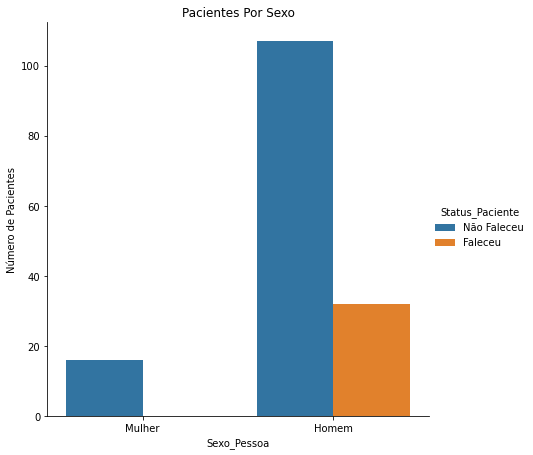

In [33]:
# Como o número de doentes é afetado pelo sexo da pessoa.
mx = sns.catplot(x = "Sexo_Pessoa", hue = 'Status_Paciente', data = dados_hepatite, kind = "count", height = 6)
mx.set(ylabel = 'Número de Pacientes')
plt.title('Pacientes Por Sexo');

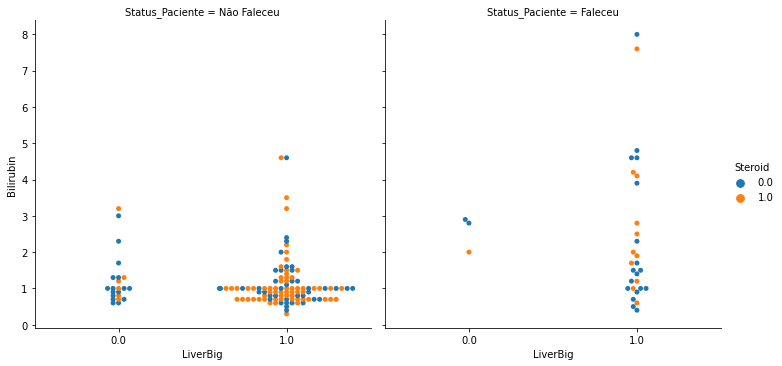

In [34]:
# Se a bilirrubina é alta e o fígado é grande, há menos chances de sobrevivência
grafico = sns.catplot(x = "LiverBig", 
                      y = "Bilirubin", 
                      hue = "Steroid", 
                      col = "Status_Paciente",
                      data = dados_hepatite, 
                      kind = "swarm")

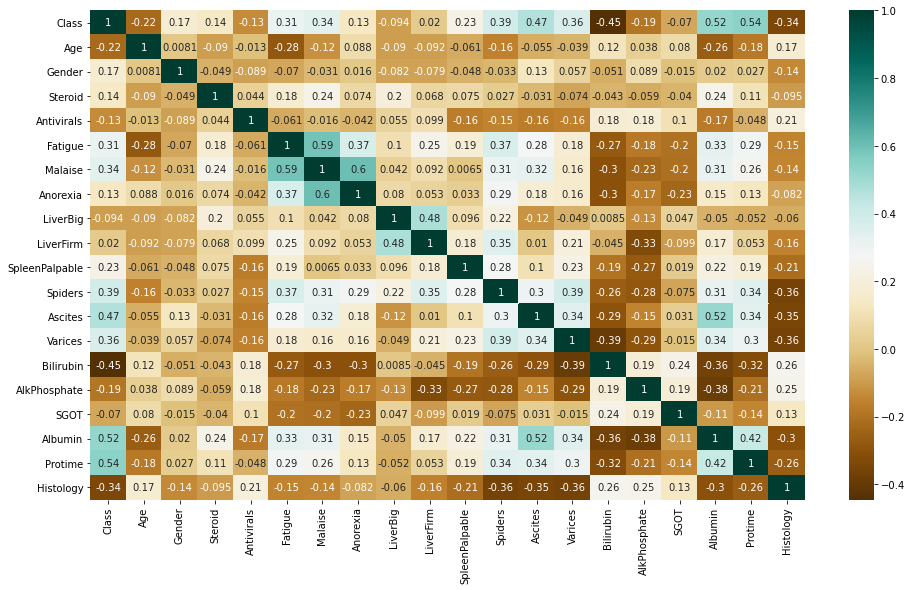

In [35]:
# Correlação entre as variáveis
plt.figure(figsize = (16,9))
sns.heatmap(dados_hepatite.corr(), cmap = "BrBG", annot = True)

Vamos remover as colunas auxiliares, que criamos apenas para análise.

In [36]:
# Não precisamos mais das colunas auxiliares, podemos removê-las
dados_hepatite.drop(['Sexo_Pessoa','Status_Paciente','Idade'], axis = 1, inplace = True)

In [37]:
dados_hepatite.head(5)

,Class,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
0,1,30,1,0.0,1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,18.0,4.0,66.0,0
1,1,50,0,0.0,1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.9,135.0,42.0,3.5,66.0,0
2,1,78,0,1.0,1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,96.0,32.0,4.0,66.0,0
3,1,31,0,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,46.0,52.0,4.0,80.0,0
4,1,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,200.0,4.0,66.0,0


## 5) Modelagem preditiva - Machine Learning

### 5.1 - Preparação dos Dados Para Modelagem

In [38]:
# Gerando X e Y
X = dados_hepatite.drop(['Class'], axis = 1)
y = dados_hepatite.Class

In [39]:
# Divisão em dados de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state = 23)

In [40]:
X_teste

,Age,Gender,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,Spiders,Ascites,Varices,Bilirubin,AlkPhosphate,SGOT,Albumin,Protime,Histology
81,36,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,62.0,224.0,4.2,100.0,0
88,38,0,0.0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.2,118.0,16.0,2.8,39.0,1
113,45,0,0.0,1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.2,81.0,65.0,3.0,66.0,0
44,34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,85.0,86.0,4.0,66.0,0
67,57,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.1,113.5,48.0,2.6,73.0,0
72,51,0,1.0,1,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,76.0,271.0,4.4,66.0,0
75,32,0,0.0,0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,55.0,45.0,4.1,56.0,0
19,38,0,0.0,0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.7,70.0,28.0,4.2,62.0,0
46,37,0,0.0,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.6,80.0,80.0,3.8,66.0,0
45,28,0,1.0,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,74.0,110.0,4.4,66.0,0


### 5.2 - Criando o algoritmo classificador

O primeiro modelo será o Algoritmo de Regressão Logística, um classificador

In [41]:
# Cria um classificador de Regressão Logística
cls_v1 = LogisticRegression(max_iter = 4000)

In [42]:
# Treina o classificador e constrói o modelo
modelo_v1 = cls_v1.fit(X_treino, y_treino)

In [43]:
# Fazendo previsões com os dados de teste
y_pred_class = modelo_v1.predict(X_teste)

In [44]:
y_pred_class

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

### 5.3 - Analisando as métricas

In [46]:
# Calculando a acurácia 0.5
print(metrics.accuracy_score(y_teste, y_pred_class))

0.8974358974358975


In [47]:
# Calculando a Confusion Matrix
conf = metrics.confusion_matrix(y_teste, y_pred_class)
print(conf)

[[ 4  3]
 [ 1 31]]


In [48]:
# Prevendo as probabilidades
predict_probabilities = modelo_v1.predict_proba(X_teste)

In [49]:
predict_probabilities

array([[0.00179039, 0.99820961],
       [0.53981735, 0.46018265],
       [0.14708511, 0.85291489],
       [0.01480486, 0.98519514],
       [0.38893186, 0.61106814],
       [0.01730337, 0.98269663],
       [0.05382224, 0.94617776],
       [0.01139854, 0.98860146],
       [0.04851175, 0.95148825],
       [0.01453452, 0.98546548],
       [0.00235433, 0.99764567],
       [0.05695541, 0.94304459],
       [0.00808596, 0.99191404],
       [0.03358868, 0.96641132],
       [0.67926713, 0.32073287],
       [0.0589723 , 0.9410277 ],
       [0.00422295, 0.99577705],
       [0.00294686, 0.99705314],
       [0.01045293, 0.98954707],
       [0.08585059, 0.91414941],
       [0.04887407, 0.95112593],
       [0.02308199, 0.97691801],
       [0.00414874, 0.99585126],
       [0.5306331 , 0.4693669 ],
       [0.00633094, 0.99366906],
       [0.0256421 , 0.9743579 ],
       [0.01721759, 0.98278241],
       [0.01295229, 0.98704771],
       [0.75105618, 0.24894382],
       [0.00404328, 0.99595672],
       [0.

In [50]:
y_true = np.array(y_teste)
fpr, tpr, thresholds = roc_curve(y_true, predict_probabilities[:,1])

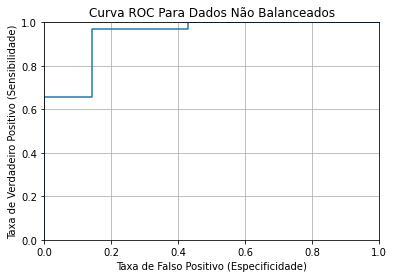

In [51]:
# Curva ROC
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC Para Dados Não Balanceados')
plt.xlabel('Taxa de Falso Positivo (Especificidade)')
plt.ylabel('Taxa de Verdadeiro Positivo (Sensibilidade)')
plt.grid(True)

In [52]:
# Métrica AUC
roc_auc = metrics.auc(fpr, tpr)
print("Area Under The ROC Curve (AUC) : %f" % roc_auc)

Area Under The ROC Curve (AUC) : 0.941964


### 5.4 - Melhorando performance do modelo com dados balanceados

In [53]:
# Treinando o modelo com dados balanceados
cls_v2 = LogisticRegression(class_weight = 'balanced', max_iter = 4000)
modelo_v2 = cls_v2.fit(X_treino, y_treino)

In [54]:
# Previsões
y_pred_class = modelo_v2.predict(X_teste)

In [55]:
y_pred_class

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [56]:
# Criando a Confusion Matrix 
conf = metrics.confusion_matrix(y_teste, y_pred_class)
print(conf)

[[ 7  0]
 [ 2 30]]


In [57]:
predict_probabilities = modelo_v2.predict_proba(X_teste)
fpr, tpr, thresholds = roc_curve(y_teste, predict_probabilities[:,1])

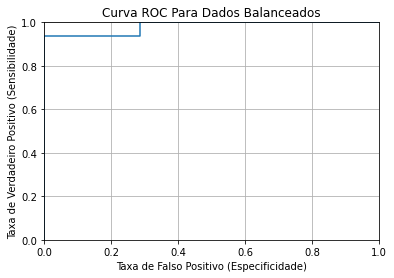

In [58]:
# Curva ROC
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Curva ROC Para Dados Balanceados')
plt.xlabel('Taxa de Falso Positivo (Especificidade)')
plt.ylabel('Taxa de Verdadeiro Positivo (Sensibilidade)')
plt.grid(True)

In [59]:
# Métrica AUC
roc_auc = metrics.auc(fpr, tpr)
print("Area Under The ROC Curve (AUC) : %f" % roc_auc)

Area Under The ROC Curve (AUC) : 0.982143


Houve melelhora no nosso modelo, com o AUC Score indo de 0.94 para 0.98

## 6) Fazendo Previsões com Novos Dados

Usaremos como exemplo para verificar o nosso modelo, um único paciente. E não iremos precisar fazer alterações nesse "novos dados".

In [61]:
# Novos dados
novo_paciente = np.array([34,0,1.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.7,62.0,214.0,4.2,100.0,0])

# Reshape do array
novo_paciente_reshaped = novo_paciente.reshape(1, -1)

In [62]:
# Prevendo as probabilidades para cada classe
modelo_v2.predict_proba(novo_paciente_reshaped)

array([[0.00452179, 0.99547821]])

In [63]:
# Prevendo a classe
modelo_v2.predict(novo_paciente_reshaped)

array([1], dtype=int64)

Este paciente não deve vir a óbito por conta da Hepatite.

# Fim